In [1]:
#!pip install catboost

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import model_selection
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import lightgbm as lgb
import numpy as np
import os
import pandas as pd
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [3]:
df =pd.read_csv('beacons.csv')
df.shape

(1916, 10)

In [4]:
X =  df.iloc[:1700,3:]
y =   df.iloc[:1700,1:3]
X1 =  df.iloc[1700:,3:]
y1 =   df.iloc[1700:,1:3]

In [5]:
y['x']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
1695    5.4
1696    5.4
1697    5.4
1698    5.4
1699    5.4
Name: x, Length: 1700, dtype: float64

In [6]:
model=CatBoostRegressor(iterations=1000, learning_rate=1.0,  loss_function='MAE', logging_level='Silent')
model.fit(X, y['y'])

In [7]:
model1=CatBoostRegressor(iterations=1000, learning_rate=1.0,  loss_function='MAE', logging_level='Silent')
model1.fit(X, y['x'])

In [8]:
predictions = model.predict(X1)
prediction= model1.predict(X1)

predictions = pd.DataFrame(predictions)
predictions = predictions.rename(columns={0:'a'})
prediction = pd.DataFrame(prediction)
prediction = prediction.rename(columns={0:'b'})

y1 =y1.reset_index()
y1['a'] = predictions['a']
y1['b'] = prediction['b']

y1['distance']=np.sqrt((y1['x']-y1['a'])**2+(y1['y']-y1['b'])**2)
y1['distance'].mean()


5.798585557147519

In [9]:
from sklearn import metrics

maex = metrics.mean_absolute_error(y1['x'],y1['a'])
maey= metrics.mean_absolute_error(y1['y'],y1['b'])
maeauto = (maex + maey)/2

In [10]:
msex = metrics.mean_squared_error(y1['x'],y1['a'])
msey= metrics.mean_squared_error(y1['y'],y1['b'])
msemain = (msex + msey)/2

In [11]:
rmsex = np.sqrt(metrics.mean_squared_error(y1['x'],y1['a']))
rmsey= np.sqrt(metrics.mean_squared_error(y1['y'],y1['b']))
rmsemain = (rmsex + rmsey)/2

In [12]:
print("Mean absolute error : ", maeauto.mean())
print("Mean squared error : ", msemain.mean())
print("Root Mean squared error : ", rmsemain.mean())

Mean absolute error :  3.7430940424070487
Mean squared error :  20.9741923587729
Root Mean squared error :  4.533196983910623


In [16]:
a = pd.DataFrame(model1.predict(X1))
b = pd.DataFrame(model.predict(X1))
b = b.rename(columns={0:'bc1'})
c = pd.concat([a,b],axis=1)
c = c.rename(columns={0:'bc2'})
preds = c.values


Y_test = y1[['a','b']]
Y_test = Y_test.values

In [17]:
def l2_dist(p1, p2):
    x1,y1 = p1
    x2,y2 = p2
    x1, y1 = np.array(x1), np.array(y1)
    x2, y2 = np.array(x2), np.array(y2)
    dx = x1 - x2
    dy = y1 - y2
    dx = dx ** 2
    dy = dy ** 2
    dists = dx + dy
    dists = np.sqrt(dists)
    return np.mean(dists), dists

#preds = ada_reg1.predict(X1)
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

3.9240507541381584


In [18]:
l2dists_mean, l2dists = l2_dist((preds[:, 0], preds[:, 1]), (Y_test[:, 0] , Y_test[:, 0]))
print(l2dists_mean)

3.9240507541381584


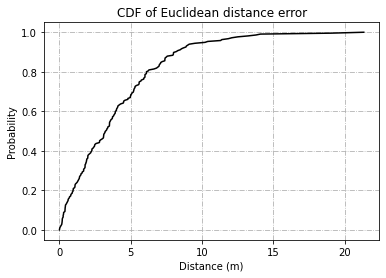

In [19]:
import numpy as np 
sortedl2_deep = np.sort(l2dists)
prob_deep = 1. * np.arange(len(sortedl2_deep))/(len(sortedl2_deep) - 1)
fig, ax = plt.subplots()
lg1, = ax.plot(sortedl2_deep, prob_deep, color='black')
plt.title('CDF of Euclidean distance error')
plt.xlabel('Distance (m)')
plt.ylabel('Probability')
plt.grid(True)
gridlines = ax.get_xgridlines() + ax.get_ygridlines()
for line in gridlines:
    line.set_linestyle('-.')

plt.savefig('Figure_CDF_error.png', dpi=300)
plt.show()
plt.close()